test matplotlib for drawing on frames

In [1]:
from deepposekit.io import VideoReader, utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

video = r'Z:\locker\ShareData\tank_for_rick\tank_vids\Fish5\time_h16m37s6\videoEOD_cropped000.avi'
skeleton_name = r'D:\github\fish-tracking\label\skeletons\tank_skeleton.csv'
frame_num = 1100
confidence_thresh = .05

predictions = pd.read_csv(os.path.splitext(video)[0] + '_tracking.csv').to_numpy()[:,1:]
predictions = predictions.reshape((-1, int(predictions.shape[1]/3), 3))  # (frane_num X feature_num X (x,y,confidence))
skeleton = utils.initialize_skeleton(skeleton_name)
graph = skeleton[["tree", "swap_index"]].values[:,0]
reader = VideoReader(video, batch_size=1, gray=True)
frame = reader[frame_num].squeeze()

array([1.3768000e+02, 1.5395999e+02, 1.1290338e-01])

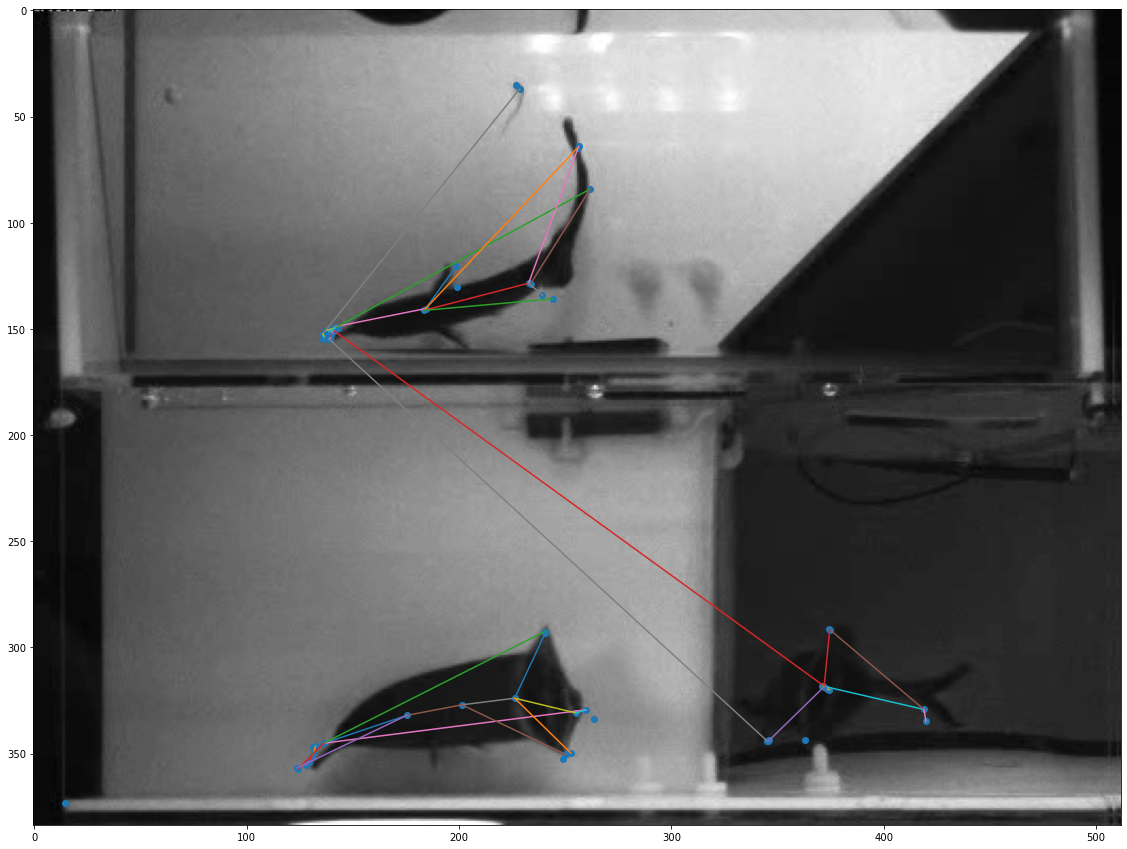

In [16]:
fig = plt.figure(figsize=(20,15))
plt.imshow(frame, cmap='gray');
plt.scatter(predictions[frame_num,:,0], predictions[frame_num,:,1])


# lines
for idx, node in enumerate(graph):
    if node >= 0:
        pt1 = predictions[frame_num,idx]
        pt2 = predictions[frame_num,node]
        if pt1[-1]>confidence_thresh and pt2[-1]>confidence_thresh:
            temp = plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
# # dots
# for idx, keypoint in enumerate(keypoints):
#     if keypoint[-1]>confidence_thresh:
#         keypoint = keypoint.astype(int)
#         cv2.circle(frame, (keypoint[0], keypoint[1]), 2, tuple(cmap[idx]), -1, lineType=cv2.LINE_AA)
# frame number
# frame = cv2.putText(frame, f'frame {frame_num}', (0,round(frame.shape[0]*.95)), cv2.FONT_HERSHEY_SIMPLEX, .5, (255, 255, 255))

pt1


In [1]:
from deepposekit.io import DataGenerator, VideoReader, VideoWriter, utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import cv2
import os

In [19]:
video = r'Z:\locker\ShareData\tank_for_rick\tank_vids\Fish5\time_h16m37s6\videoEOD_cropped000.avi'
skeleton_name = r'D:\github\fish-tracking\label\skeletons\tank_skeleton.csv'
predictions = None
fps = 300

# inits
video_output = os.path.splitext(video)[0] + '_tracking.avi'
if predictions is None:
    predictions = pd.read_csv(os.path.splitext(video)[0] + '_tracking.csv').to_numpy()[:,1:]
    predictions = predictions.reshape((-1, int(predictions.shape[1]/3), 3))  # (frane_num X feature_num X (x,y,confidence))
skeleton = utils.initialize_skeleton(skeleton_name)
graph = skeleton[["tree", "swap_index"]].values[:,0]
cmap = plt.cm.hsv(np.linspace(0, 1, len(graph)))[:, :3][:, ::-1] * 255

# make video
reader = VideoReader(video, gray=False, batch_size=1)  # errs when great=True even for gray vids
sz = (int(reader[0].shape[2]), int(reader[0].shape[1]))
writer = VideoWriter(video_output, sz, 'DIVX', fps)  # 'XVID' works on windows

print(f'writing tracking video: {video_output}')
for frame_num, frame, keypoints in tqdm.tqdm(zip(range(len(reader)), reader, predictions)):
    frame = frame[0].copy()

    # lines
    for idx, node in enumerate(graph):
        if node >= 0:
            pt1 = keypoints[idx]
            pt2 = keypoints[node]
            cv2.line(frame, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (0, 0, 255), 1, cv2.LINE_AA)
    # dots
    for idx, keypoint in enumerate(keypoints):
        keypoint = keypoint.astype(int)
        cv2.circle(frame, (keypoint[0], keypoint[1]), 2, tuple(cmap[idx]), -1, lineType=cv2.LINE_AA)
    # frame number
    frame = cv2.putText(frame, f'frame {frame_num}', (0,round(frame.shape[0]*.95)), cv2.FONT_HERSHEY_SIMPLEX, .5, (255, 255, 255))

    writer.write(frame.squeeze())

writer.close()
reader.close()


FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\locker\\ShareData\\tank_for_rick\\tank_vids\\Fish5\\time_h16m37s6\\videoEOD_cropped000_tracking.csv'

In [11]:
frame.shape

(384, 512, 1)

In [4]:
writer = VideoWriter(video_output, (100,100), 'XVID', 10)  # 'XVID' works on windows

print(f'writing tracking video: {video_output}')
for i in range(100):
    frame = np.random.randint(0,256,(100,100)).astype('uint8')
    writer.write(frame)
writer.close()


writing tracking video: Z:\locker\ShareData\tank_for_rick\tank_vids\Fish5\time_h16m58s8\videoEOD_tracking.avi


True